In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### データを生成する

In [44]:
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100)

In [45]:
x = [1, 2, 3]
y = [4, 5, 6]

In [46]:
x = ["a", "b", "c"]
y = [4, 5, 6]

### とりあえずグラフを作成してみる

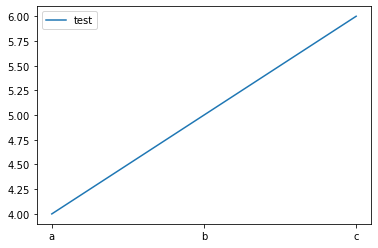

In [47]:
fig = plt.figure()  # figureオブジェクトを作成
ax = fig.add_subplot(1, 1, 1)  # figureに属するaxesオブジェクトを作成
ax.plot(x, y, label="test")
ax.legend()

### DataFrameをグラフにする

In [58]:
data = [{"p1": 1, "p2": 2}, {"p1": 3, "p2": 4}]

In [59]:
df = pd.DataFrame(data, index=["p1", "p2"])

In [60]:
df

,p1,p2
p1,1,2
p2,3,4


<AxesSubplot:>

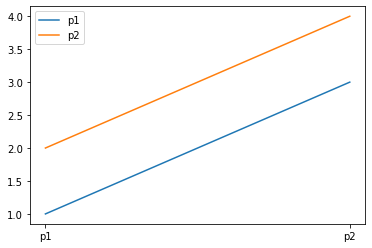

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 1])  # メモリ位置のリスト
ax.set_xticklabels(["a", "b"])  # 表示値のリスト
df.plot(ax=ax)